In [19]:
# install package
#pip install jupyter_contrib_nbextensions
# enable javascript module
jupyter contrib nbextension install

SyntaxError: invalid syntax (<ipython-input-19-ae7e844a0142>, line 4)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt
import qgrid
#from nma_class import loader
from nma_class_Copy1 import loader
from nma_class_Copy1 import eda



%matplotlib inline

# PCA

In [31]:
main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'
# initialize loader object
loader_obj = loader(main_folder)
# get available sessions
all_session_folders, all_session_names = loader_obj.get_available_session()
# load default session 
session_folder = all_session_folders[0]
session_name =  all_session_names[0]
session = loader_obj.load_session(session_folder, fast=True)#, update=True)
#channels_df = session['channels_df']
spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
# drop bad clusters
clusters_df.drop(clusters_df[clusters_df['label']=='bad'].index, axis=0, inplace=True)
trials_df = session['trials_df']
# drop not included trials
trials_df.drop(trials_df[~trials_df['included']].index, axis=0, inplace=True)
trials_df.drop('included', axis=1, inplace=True)
# insert trial length
trials_df.insert(7, 'trial length', (trials_df['end time']-trials_df['start time']) )

In [32]:
from nma_class2 import pca
pca = pca()
from nma_class2 import glm
glm = glm()
%matplotlib notebook

In [33]:
#perform pca:

# specify window for mean firing rate in milli seconds
window = 10
spikes = clusters_df['spikes']
# specify event to find mena firing rate around
event = 'stim time'
events = trials_df[event]
# get data matrix
X = pca.get_data_matrix(events, spikes, window)
# perform PCA
score, evectors, evals = pca.pca(X)

<IPython.core.display.Javascript object>


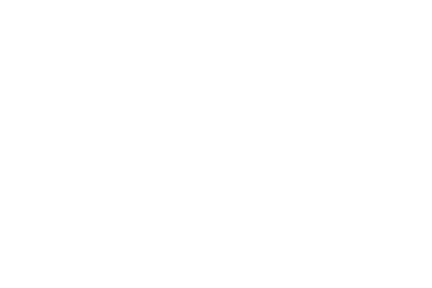

<IPython.core.display.Javascript object>


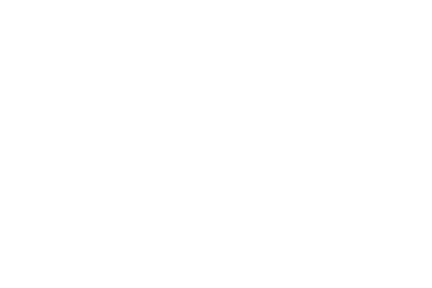

In [34]:
#plot the eigenvalues
pca.plot_eigenvalues(evals)
plt.xlim([0, 100])  # limit x-axis up to 100 for zooming
plt.show()

<IPython.core.display.Javascript object>


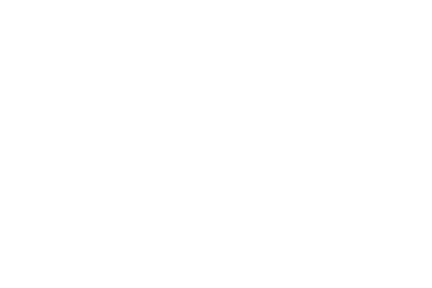

<IPython.core.display.Javascript object>


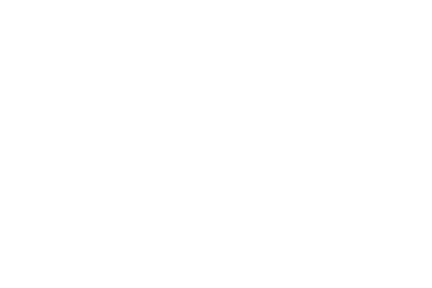

In [35]:
# calculate the variance explained
variance_explained = pca.get_variance_explained(evals)
# Uncomment to plot the variance explained
pca.plot_variance_explained(variance_explained, 0.95)
plt.show()

<IPython.core.display.Javascript object>


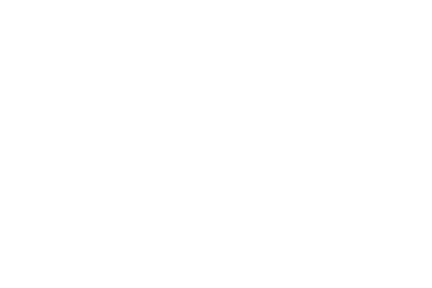

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2b26cc10>)

<IPython.core.display.Javascript object>


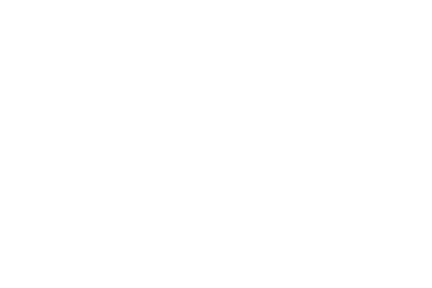

In [26]:
# initialize figure and axis
fig, ax = plt.subplots()
## plot trials different colour depending on stim sice
# get bool selector
stim = np.logical_or(trials_df['stim contrast left']!=0, trials_df['stim contrast right']!=0)
## plot trials different shape based on correct choice
# get bool selector
correct = (trials_df['feedback type']==1)
# plot trials with stim and correct
select = np.logical_and(stim, correct)
pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='g', edgecolor='g', fig=fig, ax=ax)
# plot trials without stim and correct
#select = np.logical_and(~stim, correct)
#pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='none', edgecolor='g', fig=fig, ax=ax)
# plot not stim trials and incorrect
#select = np.logical_and(stim, ~correct)
#pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='r', edgecolor='r', fig=fig, ax=ax)
# plot trials without stim and incorrect
select = np.logical_and(~stim, ~correct)
pca.plot_pca_scatter(score[select], 0, 1, events[select].index.values, print_labels=True, facecolor='none', edgecolor='r', fig=fig, ax=ax)

<IPython.core.display.Javascript object>


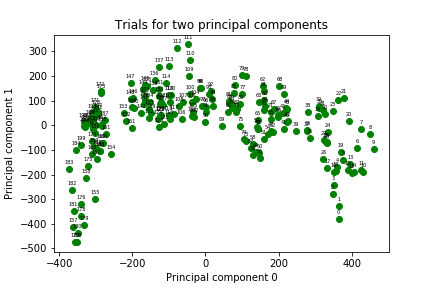

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a25637910>)

In [17]:
fig, ax = plt.subplots()
## plot trials different colour depending on stim sice
# get bool selector
stim = np.logical_or(trials_df['stim contrast left']!=0, trials_df['stim contrast right']!=0)
## plot trials different shape based on correct choice
# get bool selector
correct = (trials_df['feedback type']==1)
pca.plot_pca_scatter(score, 0, 1, events.index.values, print_labels=True, facecolor='g', edgecolor='g', fig=fig, ax=ax)

In [ ]:
fig, ax, anim = pca.plot_pca_scatter_animated(score, 0, 1, fig=None, ax=None, line_col='grey', line_width=1, 
                         maker_shape='o', marker_col='red', marker_facecol='red', marker_size=4)
#plt.show()
# save animation
#plot_folder = "E:/3 Projekte/Neuromatch Summer School/Projekt/plots"
#f = os.path.join(plot_folder, 'pca_animation.gif')
#writergif = animation.PillowWriter(fps=30) 
#anim.save(f, writer=writergif)

In [2]:
# link to parent folder with all datasets
#main_folder = "/content/gdrive/My Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "C:/Users/User/Google Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "Z:/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "E:/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'


# initialize loader object
loader = loader(main_folder)

In [3]:
# get available sessions
all_session_folders, all_session_names = loader.get_available_session()

# Neuromatch Academy Project - Steinmetz Dataset - Mouse Mind Reading

In [4]:
# load default session = 
session = loader.load_session(all_session_folders[0])
#channels_df = session['channels_df']
spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
trials_df = session['trials_df']

In [5]:
## alternatively you can also initizalize the loader object with the default session = first folder in main folder:

## initialize with default session
#loader = loader(main_folder, init_default=True)
#session = loader.default_session

In [5]:
from nma_class_Copy1 import loader
#to load older sessions 
loader = loader(main_folder)
all_session_folders, all_session_names = loader.get_available_session()
# load default session 
# put here any integer instead of 0 or directly the folder of the session
session_folder = all_session_folders[0]
session_name =  all_session_names[0]
session = loader.load_session(session_folder, fast=True)

spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
trials_df = session['trials_df']

In [6]:
session_name

'Cori_2016-12-14'

# <font color='blue'>DFs: </font> 

<font color='green'>
1. clusters_df

2. spikes_df
    * (wheel mov vars)

    

3. trials_df 
    * all correct
    * only diff contrast
    * contrast=0 
    * print % 
    * plotting 
    
    
4. wheel_df
    * plots about wheel mov
    
</font>
    



# <font color='orange'>ToDo: </font> 

<font color='red'>

 * history of rew or repeated stim appearance
    
    
 * plot MOs clusters (cluster = [264, 271, 273]) aligned to stim time: 
    "Here, we focus on evidence from rodent studies, highlighting recent findings of early and context-dependent choice-related activity in M2 during voluntary behavior. Based on the current understanding, we suggest that a major function for M2 is to **flexibly map such antecedent signals as sensory cues to motor actions** , thereby enabling adaptive choice behavior." - Secondary motor cortex: where ‘sensory’ meets ‘motor’ in the rodent frontal cortex, 2016
    separate the MOs in contrast vs 0contrast trials !!!!!
    
</font>

# <font color='red'>Spikes: </font> 

In [7]:
spikes_df.head()

,cluster,spike_times
0,527,0.003367
1,487,0.004733
2,243,0.006767
3,510,0.006933
4,435,0.007433


In [8]:
# Filter to visual areas, clusters = 220, 730, 867, 873, 884 #this for session2? 
spikes_VISp_df = spikes_df.loc[(spikes_df['cluster']==220) | (spikes_df['cluster']==730) 
                               | (spikes_df['cluster']==867) | (spikes_df['cluster']==873)
                               | (spikes_df['cluster']==884)]
spikes_VISp_df.head()

,cluster,spike_times
3604,730,2.498018
3646,730,2.508318
3883,730,2.566518
4608,730,2.750619
4729,873,2.786953


## <font color='blue'>Plot spike trains: </font> 


1) Plotting functions from Max: 
https://github.com/KceniaB/NMA_project/blob/master/README.md 

In [9]:
# 1) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 

data = [spikes_df, clusters_df, trials_df]
params = dict()
params['sampling_rate'] = 20000

session_eda = eda(data, all_session_names[0], all_session_folders[0], params)

In [10]:
print((clusters_df['spikes'][3]))

[  16.71396667   22.98326667   89.84936667  173.18523333  173.25496667
  186.591       201.8251      267.94446667  306.29383333  306.3262
  322.18396667  330.6779      338.29126667  342.19883333  439.31736667
  441.97016667  456.38586667  484.4116      503.97266667  525.39213333
  553.03253333  638.11606667  697.04793333  735.27566667  784.89776667
  802.67823333  803.18303333  848.41523333 1021.07643333 1131.53843333
 1136.8733     1137.3091     1144.78966667 1147.22083333 1162.69216667
 1171.7392     1188.04256667 1199.01926667 1199.03173333 1212.5004
 1217.05243333 1217.7916     1224.7705     1225.4039     1225.92206667
 1230.322      1235.1263     1242.78816667 1257.01346667 1259.72493333
 1260.2106     1261.10483333 1261.1307     1269.97746667 1270.39273333
 1271.50943333 1272.51336667 1289.55476667 1291.0224     1291.69346667
 1295.6393     1295.65986667 1296.53563333 1298.83876667 1299.2554
 1299.2616     1300.04863333 1301.5774     1301.6557     1302.1508
 1306.6696     1306.70

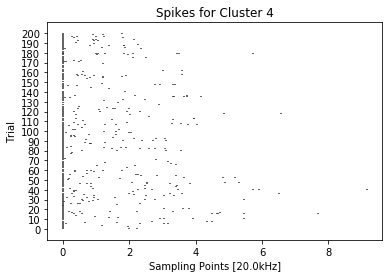

'\nThis means that Cluster 4 had the following spike times(xx) per trial(yy)\n'

In [11]:
# 1) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 
cluster = 4
spikes = clusters_df.loc[cluster, 'spikes']
trials_select_df = trials_df.loc[trials_df['included']==True, ['start time','end time']]
fig, ax = session_eda.plt_spike_train(cluster, spikes, trials_select_df)
plt.show()

'''
This means that Cluster 4 had the following spike times(xx) per trial(yy)
'''

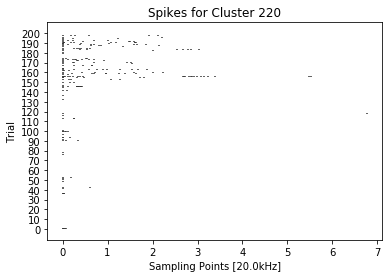

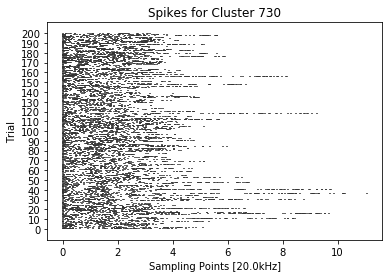

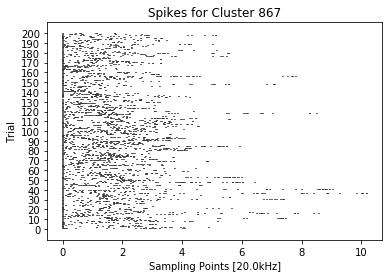

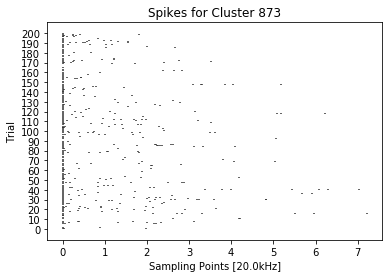

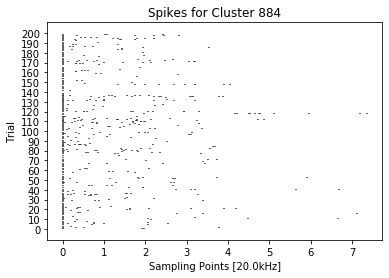

In [12]:
# 1) Plot for many clusters

cluster = [220, 730, 867, 873, 884]

for i in range(len(cluster)): 
    spikes = clusters_df.loc[cluster[i], 'spikes']
    trials_select_df = trials_df.loc[trials_df['included']==True, ['start time','end time']]
    fig, ax = session_eda.plt_spike_train(cluster[i], spikes, trials_select_df)
plt.show()

## <font color='blue'>Plot spike trains around event with histogram: </font> 


2) Plotting functions from Max: 
https://github.com/KceniaB/NMA_project/blob/master/README.md 

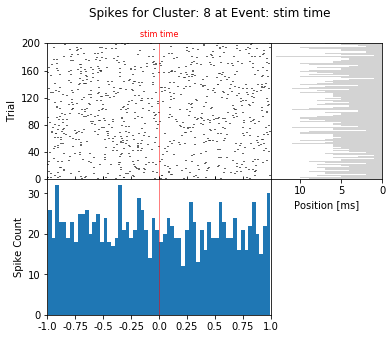

In [13]:
# 2) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 
title = None
cluster = 8
event = 'stim time'
window = 1
trials_select_df =  session['trials_df'].loc[session['trials_df']['included']==True, 'stim time']
spikes = clusters_df.loc[8, 'spikes']

fig, (ax1, ax2, ax3) = session_eda.plt_spike_train_hist_bar(cluster, event, window, trials_select_df, spikes)

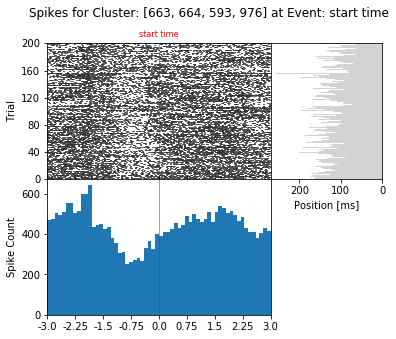

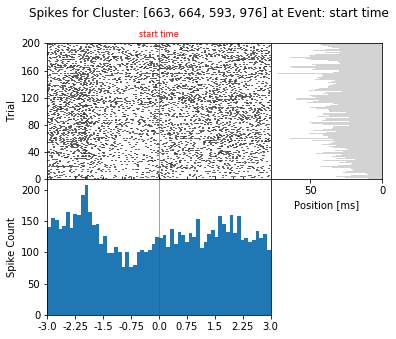

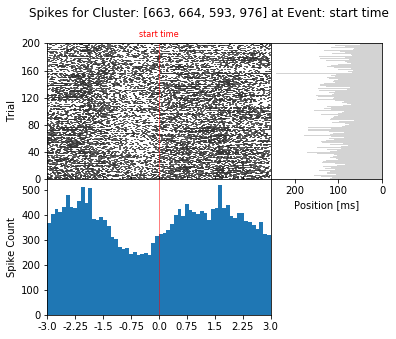

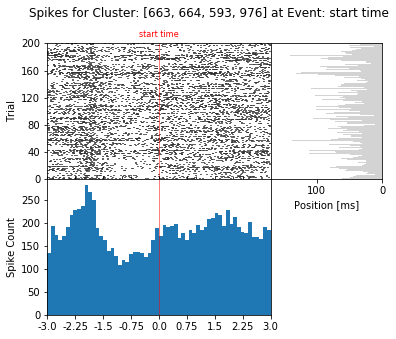

In [17]:
# 2) Plotting functions from Max: 
# https://github.com/KceniaB/NMA_project/blob/master/README.md 
title = None
#cluster = [220, 730, 867, 873, 884]
cluster = [663, 664, 593, 976] #visual primary cortx
#cluster = [264, 271, 273] #MOs

event = 'start time' #select the event to be time = 0 and plot the spikes around it
window = 3 #from -1 to 1 seconds if window = 1

for i in range(len(cluster)): 
    trials_select_df =  session['trials_df'].loc[session['trials_df']['included']==True, 'start time']
    spikes = clusters_df.loc[cluster[i], 'spikes']
    fig, (ax1, ax2, ax3) = session_eda.plt_spike_train_hist_bar(cluster, event, window, trials_select_df, spikes)
plt.show()

# <font color='red'>Clusters: </font> 

In [15]:
clusters_df.head()

,label,spikes,total spikes,recording area
cluster,,,,
0,bad,"[0.8149, 14.822466666666667, 24.9646, 25.1436,...",826,ACA
1,bad,"[0.0281, 0.7068666666666666, 1.3172, 1.4209666...",2818,MOs
2,bad,"[77.22096666666667, 87.62533333333333, 87.7326...",3953,ACA
3,bad,"[16.713966666666668, 22.983266666666665, 89.84...",646,LS
4,mua,"[0.8383666666666667, 1.4296666666666666, 5.238...",5124,LS


In [17]:
clusters_df.drop(clusters_df[clusters_df['label']=='bad'].index, axis=0, inplace=True)
clusters_df

,label,spikes,total spikes,recording area
cluster,,,,
4,mua,"[0.8383666666666667, 1.4296666666666666, 5.238...",5124,LS
5,mua,"[0.0155, 0.8953666666666666, 1.3817, 1.8120333...",2733,ACA
8,mua,"[0.17423333333333332, 0.19976666666666668, 0.2...",5905,LS
12,mua,"[2.3132, 3.0502333333333334, 3.6675, 4.928, 5....",6704,ACA
18,mua,"[3.3243666666666667, 7.3177666666666665, 8.189...",5589,MOs
...,...,...,...,...
994,mua,"[2.7875193566472314, 2.809886123350189, 3.0496...",10533,DG
996,mua,"[2.543018263105959, 5.156129950356261, 5.19923...",1639,root
998,mua,"[2.4551178699678085, 3.6627566045154234, 5.027...",1523,SUB


In [64]:
# Filter to visual area
cluster_VISp_df = clusters_df.loc[(clusters_df['recording area']=='VISp')]
# cluster_VISp_df = cluster_VISp_df.loc[(cluster_VISp_df['label']=='good')] #already did it above

In [19]:
cluster_VISp_df

,label,spikes,total spikes,recording area
cluster,,,,
567,mua,"[9.13218106674297, 9.13584774980903, 13.205432...",1529,VISp
582,mua,"[3.475989102523365, 5.009762629055684, 6.16016...",7821,VISp
593,mua,"[2.5100847824762686, 2.5317182125660147, 2.565...",46031,VISp
596,mua,"[2.8827531159174993, 3.1322875653039977, 3.365...",16206,VISp
599,mua,"[2.4481178386598783, 2.939553369958989, 2.9427...",29596,VISp
607,mua,"[2.505751429761836, 2.7091523394808332, 2.8498...",3336,VISp
608,mua,"[3.0395204837327148, 7.297606194864169, 8.8532...",6993,VISp
621,mua,"[2.4470178337400608, 2.5937184898648242, 3.030...",12142,VISp
623,mua,"[8.790979540705006, 14.924706974055118, 17.004...",547,VISp


In [33]:
# Filter to MOs
cluster_MOs_df = clusters_df.loc[(clusters_df['recording area']=='MOs')]
# cluster_VISp_df = cluster_VISp_df.loc[(cluster_VISp_df['label']=='good')] #already did it above

In [40]:
cluster_MOs_df

,label,spikes,total spikes,recording area
cluster,,,,
18,mua,"[3.3243666666666667, 7.3177666666666665, 8.189...",5589,MOs
32,mua,"[0.07473333333333333, 0.8882, 1.30586666666666...",9470,MOs
46,mua,"[2.300666666666667, 2.8478666666666665, 20.056...",7548,MOs
57,mua,"[1.6581666666666666, 4.042933333333333, 5.0475...",1210,MOs
62,mua,"[15.808133333333334, 21.059, 22.6638, 22.80576...",4433,MOs
66,mua,"[0.4845, 0.7609333333333334, 1.3231, 1.7854666...",3623,MOs
74,mua,"[1.4441333333333333, 1.6437333333333333, 2.040...",3531,MOs
81,mua,"[9.646466666666667, 13.3562, 17.15123333333333...",1656,MOs
102,mua,"[0.09123333333333333, 1.9058333333333333, 3.95...",3047,MOs


In [188]:
# Filter to 
cluster_DG_df = clusters_df.loc[(clusters_df['recording area']=='DG')]
# cluster_VISp_df = cluster_VISp_df.loc[(cluster_VISp_df['label']=='good')] #already did it above
cluster_DG_df

,label,spikes,total spikes,recording area
cluster,,,,
0,bad,"[2.6330666666666667, 5.272966666666667, 8.4226...",15380,DG
37,mua,"[1372.7682333333332, 1674.6147, 2608.696766666...",12,DG
43,bad,"[0.9697, 2.0197666666666665, 5.386133333333333...",3742,DG
53,bad,"[154.7508, 155.0918, 176.2217, 296.24136666666...",770,DG
62,bad,"[0.05893333333333333, 0.0937, 0.10636666666666...",67649,DG
67,bad,"[0.1167, 0.13306666666666667, 0.13666666666666...",15931,DG
69,bad,"[0.1014, 0.1038, 0.10613333333333333, 0.541033...",12613,DG
84,mua,"[0.3924, 0.9134666666666666, 0.9399, 0.9769666...",4300,DG
91,bad,"[0.0124, 0.1101, 0.13566666666666666, 0.1478, ...",52252,DG


# <font color='red'>Trials: </font> 

In [164]:
 trials_df

,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement,trial_number,startA,stimA,responseA,feedbackA,endA
0,True,1,62.900284,65.269408,66.419612,66.456227,67.423484,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,...",1,0,2.36912,3.51933,3.55594,4.5232
1,True,1,68.420838,71.202703,72.602206,72.640326,73.604476,0,0,-1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0,2.78187,4.18137,4.21949,5.18364
2,True,1,74.602902,76.052380,77.001671,77.038396,78.006757,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,0,1.44948,2.39877,2.43549,3.40385
3,True,1,79.003653,81.235263,83.502065,83.531699,84.506778,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,0,2.23161,4.49841,4.52805,5.50312
4,True,1,85.501795,86.800952,87.617727,87.628565,88.621336,0,1,1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,0,1.29916,2.11593,2.12677,3.11954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,False,5,1109.529226,1110.110867,1111.564004,1111.571290,1112.569226,0,1,1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",210,0,0.581641,2.03478,2.04206,3.04
210,False,6,1113.562081,1114.277333,1115.497692,1115.508153,1116.500302,0,1,1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",211,0,0.715252,1.93561,1.94607,2.93822
211,False,7,1117.495128,1117.926592,1120.232805,1120.237428,1121.238999,0,1,0,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",212,0,0.431463,2.73768,2.7423,3.74387
212,False,8,1122.231454,1122.576266,1124.854126,1124.857902,1125.861004,0,1,0,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",213,0,0.344811,2.62267,2.62645,3.62955


In [42]:
max(trials_df['wheel movement'][8])

1.0

In [43]:
# 1. All correct 
# create new variable with true where all the trials are correct = 1
#all_correct = (trials_df['feedback type']==1)
#print(all_correct.head())

# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

# Create data frame only with the correct
correct_df = trials_df.loc[(trials_df['feedback type']==1)]
correct_df.head()


,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
0,True,1,62.900284,65.269408,66.419612,66.456227,67.423484,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
1,True,1,68.420838,71.202703,72.602206,72.640326,73.604476,0,0,-1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,True,1,74.602902,76.052380,77.001671,77.038396,78.006757,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,True,1,79.003653,81.235263,83.502065,83.531699,84.506778,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,True,4,102.902255,105.566451,107.663576,107.704085,108.663712,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [167]:
#incorrect_df = trials_df.loc[(trials_df['feedback type']==-1)]
#incorrect_df

no_contrasts2_df = incorrect_df.loc[(incorrect_df['stim contrast left']==0) & (incorrect_df['stim contrast right']==0)]
no_contrasts2_df.head()

,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement,trial_number,startA,stimA,responseA,feedbackA,endA
5,True,1,89.617592,90.650613,92.167720,92.197438,93.171471,0,0,1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6,0,1.03302,2.55013,2.57985,3.55388
6,True,2,94.167702,95.984298,97.117508,97.126316,98.119701,0,0,-1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7,0,1.8166,2.94981,2.95861,3.952
7,True,3,99.117619,99.550755,100.900586,100.907576,101.903975,0,0,-1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8,0,0.433136,1.78297,1.78996,2.78636
18,True,1,165.596946,167.830244,168.863679,168.872260,169.867487,0,0,-1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",19,0,2.2333,3.26673,3.27531,4.27054
19,True,2,170.863626,171.412701,172.913387,172.915924,173.916891,0,0,-1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",20,0,0.549074,2.04976,2.0523,3.05327


In [44]:
# 2. Create one df only for dif contrast trials and another for 0 and 0 

#2.1 diff contract trials
diff_contrasts_df = correct_df.loc[(correct_df['stim contrast left']!=(correct_df['stim contrast right']))]
diff_contrasts_df.head()

,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
0,True,1,62.900284,65.269408,66.419612,66.456227,67.423484,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,..."
2,True,1,74.602902,76.052380,77.001671,77.038396,78.006757,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,True,1,109.661966,111.066939,112.316606,112.353759,113.319761,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13,True,1,132.848384,133.282493,134.615678,134.652514,135.620112,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
15,True,1,140.116488,143.097849,143.731404,143.767860,144.735296,0,1,-1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [45]:
# 2. Create one df only for dif contrast trials and another for 0 and 0 

#2.2 same contrast 0
no_contrasts_df = correct_df.loc[(correct_df['stim contrast left']==0) & (correct_df['stim contrast right']==0)]
no_contrasts_df.head()

,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement
1,True,1,68.420838,71.202703,72.602206,72.640326,73.604476,0,0,-1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,True,1,79.003653,81.235263,83.502065,83.531699,84.506778,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,True,4,102.902255,105.566451,107.663576,107.704085,108.663712,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10,True,1,114.318209,115.982617,116.832742,116.868631,117.834661,0,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11,True,1,118.833840,123.716340,126.403458,126.433983,127.404783,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [49]:
all_t = len(trials_df)
crrct = len(correct_df)
cont = len(diff_contrasts_df)
nocont = len(no_contrasts_df)

df1 = ''
df1 = {#'session name': [session_name],
      'sessio name': ' CHANGE ',
      'all trials': [all_t], 
      'correct trials': [crrct], 
      'diff contrast t': [cont], 
      'no contras': [nocont], 
      '%Correct': [round(crrct/all_t*100,2)], '%Contrast':[round(cont/crrct*100,2)], '% 0contrast':[round(nocont/crrct*100,2)]}

df2 = pd.DataFrame(data=df1)


print('Correct trials: ', crrct,'/',all_t, '->', round(crrct/all_t*100,2), '%')
print('Dif contrast trials: ', cont,'/',crrct, '->', round(cont/crrct*100,2), '%')
print('0 Contrast trials: ', nocont,'/',crrct, '->', round(nocont/crrct*100,2), '%')
df2

Correct trials:  141 / 214 -> 65.89 %
Dif contrast trials:  57 / 141 -> 40.43 %
0 Contrast trials:  84 / 141 -> 59.57 %


,sessio name,all trials,correct trials,diff contrast t,no contras,%Correct,%Contrast,% 0contrast
0,CHANGE,214,141,57,84,65.89,40.43,59.57


In [50]:
#add the different values per session 
# to initialize
#df3 = df2
#df4 = df2

In [51]:
#to keep adding
df4 = df4.append(df2) 

df4 

NameError: name 'df4' is not defined

In [52]:
test = []

test = trials_df['stim time'] - trials_df['start time']

In [53]:
test
print(max(test))
print(min (test))

8.298038045912165
0.32721510941570386


In [54]:
#add new column to existing df

# creating a new column TRIAL_NUMBER, from the index
trials_df['trial_number'] = trials_df.index+1
trials_df.head()

,included,repetition number,start time,stim time,response time,feedback time,end time,stim contrast left,stim contrast right,response choice,feedback type,wheel movement,trial_number
0,True,1,62.900284,65.269408,66.419612,66.456227,67.423484,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0,...",1
1,True,1,68.420838,71.202703,72.602206,72.640326,73.604476,0,0,-1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
2,True,1,74.602902,76.052380,77.001671,77.038396,78.006757,1,0,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
3,True,1,79.003653,81.235263,83.502065,83.531699,84.506778,0,0,0,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
4,True,1,85.501795,86.800952,87.617727,87.628565,88.621336,0,1,1,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5


In [55]:
df_aligned = trials_df
df_aligned['startA'] = ""
df_aligned['stimA'] = ""
df_aligned['responseA'] = ""
df_aligned['feedbackA'] = ""
df_aligned['endA'] = ""

for i in range(0,len(df_aligned)):
    df_aligned['startA'][i] = df_aligned['start time'][i]-trials_df['start time'][i]
    #print(df_aligned['go cueA'][i])
    df_aligned['stimA'][i] = df_aligned['stim time'][i]-trials_df['start time'][i]
    #print(df_aligned['stim timeA'][i])
    df_aligned['responseA'][i] = df_aligned['response time'][i]-trials_df['start time'][i]
    df_aligned['feedbackA'][i] = df_aligned['feedback time'][i]-trials_df['start time'][i]
    df_aligned['endA'][i] = df_aligned['end time'][i]-trials_df['start time'][i]


    
    
    
    
    
    
#to test 
#df = pd.DataFrame(data) 
#df['C'] = ""
#for i in range(0,len(A)): 
#    df['C'][i] = B[i]-A[i]
#df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path

In [56]:
min(df_aligned['stimA'])

0.32721510941570386

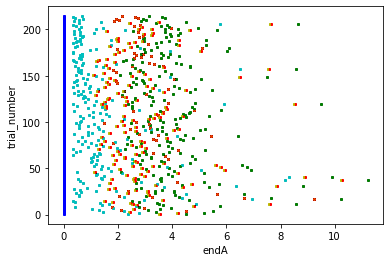

In [57]:
#scatter plot divided by colors according to visual stim, auditory cue, response (end of rotation), rew/norew, end of the trial
df = df_aligned

ax = plt.gca()
    
for i in range (1,len(df)):
    #df.plot.scatter(x='go cue', y='trial_number', s=0.2, c=np.where((df['response choice']==1), 'r', 'g'), marker='.', grid=False, ax=ax)
    df.plot.scatter(x='startA', y='trial_number', s=0.2, c='b', grid=False, ax=ax)
    df.plot.scatter(x='stimA', y='trial_number', s=0.2, c='c',grid=False, ax=ax)
    df.plot.scatter(x='responseA', y='trial_number', s=0.2, c='y', grid=False, ax=ax)
    df.plot.scatter(x='feedbackA', y='trial_number', s=0.2, c='r', grid=False, ax=ax)
    df.plot.scatter(x='endA', y='trial_number', s=0.2, c='g', grid=False, ax=ax)



#plt.savefig(...)
#fig=plt.figure(figsize=(50, 50))
plt.show()

In [53]:

#how to pick a new variable from dataset "session"
eye_area = session['eye_area']
eye_area
len(eye_area)

KeyError: 'eye_area'

In [ ]:
wheel_position = session['wheel_position']
wheel_position

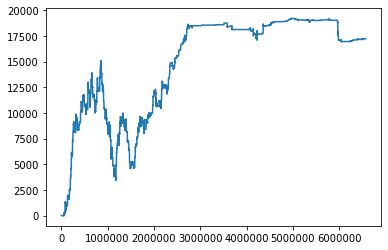

In [24]:
plt.plot(wheel_position)

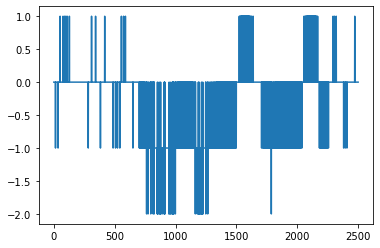

In [61]:
#plt.plot(trials_df['stim contrast left'])
#plt.plot(trials_df['stim contrast right'])
#plt.plot(trials_df['response choice'])

test = np.cumsum(trials_df['wheel movement'])
plt.plot(trials_df['wheel movement'][1])



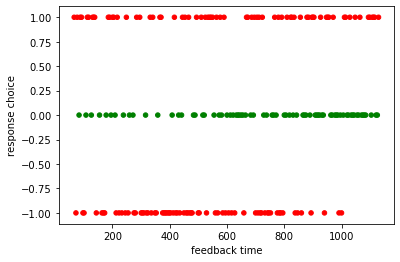

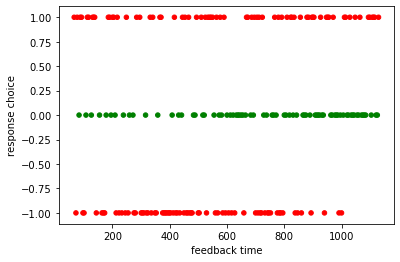

In [240]:
#scatter plot divided by colors according to 
df = trials_df
df.plot.scatter(x='feedback time', y='response choice', s=20, c=np.where(df['response choice'], 'r', 'g'), grid=False)
df.plot.scatter(x='feedback time', y='response choice', s=20, c=np.where(df['response choice'], 'r', 'g'), grid=False)
plt.show()

In [103]:
go_cues_diff = ((trials_df['stim time'] - trials_df['go cue']))
print(go_cues_diff)
print(min(go_cues_diff)) #0.49
print(max(go_cues_diff)) #1.19 
plt.plot(go_cues_diff)

KeyError: 'go cue'

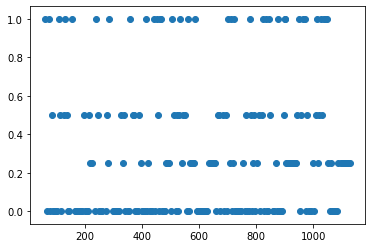

In [281]:
plt.scatter(trial_df.trials_intervals, trial_df.trials_vStim_cLeft)

In [218]:
# create new variable with true where all the contrast left is 0
is_0 =  trial_df['trials_vStim_cLeft'] ==0


# create new variable with true where all the contrast is 0 in both - NoGo trials
is_0_RL = (trial_df['trials_vStim_cLeft']==0) & (trial_df['trials_vStim_cRight']==0)
print(is_0_RL.head())

len(is_0_RL)

0    False
1    False
2    False
3     True
4    False
dtype: bool


214

In [219]:
# filter data by creating a new dataframe


In [220]:
# difference between consecutive rows - trials_intervals
# https://pythontic.com/pandas/dataframe-computations/difference

trials_intervals_diff = trial_df.trials_intervals.diff()

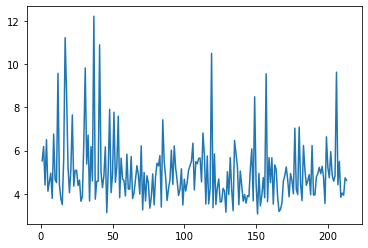

In [221]:
plt.plot(trials_intervals_diff)

In [256]:
# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

# Create data frame only with the NoGo
trial2_df = trial_df.loc[(trial_df['trials_vStim_cLeft'] == 0) & (trial_df['trials_vStim_cRight']==0)]
trial2_df.head()

,trials_resp_choice,trials_resp_times,trials_goCue_times,trials_vStim_cLeft,trials_vStim_cRight,trials_vStim_times,trials_intervals,trials_feedback_times,trials_feedbackType,trials_included,trials_repNum
3,0.0,83.502065,81.996875,0.0,0.0,81.235263,79.003653,83.531699,1.0,True,1.0
5,1.0,92.167720,91.837432,0.0,0.0,90.650613,89.617592,92.197438,-1.0,True,1.0
6,-1.0,97.117508,96.572307,0.0,0.0,95.984298,94.167702,97.126316,-1.0,True,2.0
7,-1.0,100.900586,100.157164,0.0,0.0,99.550755,99.117619,100.907576,-1.0,True,3.0
8,0.0,107.663576,106.157660,0.0,0.0,105.566451,102.902255,107.704085,1.0,True,4.0
11,0.0,126.403458,124.897959,0.0,0.0,123.716340,118.833840,126.433983,1.0,True,1.0
16,0.0,154.949572,153.444014,0.0,0.0,152.697202,145.730701,154.979639,1.0,True,1.0
18,-1.0,168.863679,168.598656,0.0,0.0,167.830244,165.596946,168.872260,-1.0,True,1.0
19,-1.0,172.913387,172.534318,0.0,0.0,171.412701,170.863626,172.915924,-1.0,True,2.0
20,0.0,178.034969,176.529182,0.0,0.0,175.479965,174.913822,178.065607,1.0,True,3.0


In [ ]:
#plt.plot(trial_df.trials_feedbackType)
trial_df.trials_feedbackType

df4 = trial_df['trials_feedbackType']({'a': trial_df['trials_feedbackType'] == 1, 'b': trial_df['trials_feedbackType'] == -1})
plt.figure();
ax = df4.plot.area()


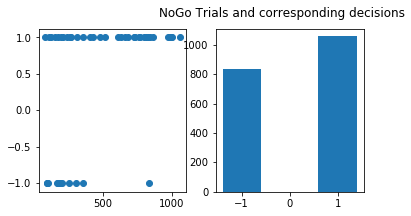

In [278]:
#https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.scatter(trial2_df['trials_vStim_times'],trial2_df['trials_feedbackType'])

plt.subplot(132)
plt.bar(trial2_df['trials_feedbackType'], trial2_df['trials_vStim_times'],)

plt.suptitle('NoGo Trials and corresponding decisions')
plt.show()

#plt.scatter(trial2_df['trials_vStim_times'],trial2_df['trials_feedbackType'])

#plotting, within 0 contrast (NoGo trials), how many times they did false positives, i.e., turned the wheel 


Trial history

In [54]:
#Incomplete
for i in range(3, len(trials_select_df)): 
    if trials_select_df['feedback type'][i] == -1: 
        
        trials_select_df['feedback type'][i]

KeyError: 'feedback type'

# Wheel

In [ ]:
# add wheelmovement
print(session['wheel_position'].shape)
print(session['wheel_timestamps'].shape)
print(session['wheelMoves_intervals'].shape)
print(session['wheelMoves_type'].shape)

'''
0 for 'flinches' or otherwise unclassified movements, 
1 for left/clockwise turns, 
2 for right/counter-clockwise turns 
(where again "left" means "would be the correct direction for a stimulus presented on the left). 
A detected movement is counted as 'left' or 'right' only if it was sufficient amplitude that it would have registered 
a correct response (and possibly did), within a minimum amount of time from the start of the movement. 
Movements failing those criteria are flinch/unclassified type.
'''

In [ ]:
session['wheel_position'][1]

In [ ]:
wheel_df = pd.merge( pd.DataFrame(session['wheelMoves_intervals']), pd.DataFrame(session['wheelMoves_type']), how='left', left_index=True, right_index=True)

In [ ]:
wheel_df

In [ ]:
## Duration of the wheel movement - wheel_mov_dur

#duration of the wheel movement
wheel_mov_dur = wheel_df[1]-wheel_df['0_x'] 
wheel_mov_dur
wheelMoves_type1 = session['wheelMoves_type']


#create empty array of given length; bar plot
##create var wheel_Moves_type2 where 0 is L and 1 is R
wheelMoves_type2 = [0] * (len(wheelMoves_type1))
for i in range(len(wheelMoves_type1)):
    if wheelMoves_type1[i] == 0: 
        wheelMoves_type2[i] = 'unclassified'
        #print('0')
    elif wheelMoves_type1[i] == 1:
        wheelMoves_type2[i] = 'left'
        #print('1')
    else:
        wheelMoves_type2[i] = 'right'
        #print('2')    

        
colors = {'unclassified':'red', 'left':'blue', 'right':'green'}

#plot the figure 
plt.figure(figsize=(9, 3))

plt.subplot(131)
#plt.plot(wheel_mov_time2)

plt.subplot(132)
plt.bar(wheelMoves_type2,wheel_mov_dur)

plt.subplot(133)

#plt.plot(wheel_mov_time2)

plt.suptitle('Title')
plt.show()


#for i in range(len(test1)):
#    if test1[i] == 0: 
#        print('0')
#    else: 
#        print('1')

In [18]:
len(trials_df['wheel movement'][1])

2500

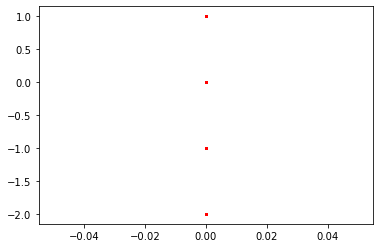

In [22]:

for i in range(len(trials_df['wheel movement'][1])): 

    plt.plot(trials_df['wheel movement'][1][i], 'ro',markersize=1)

# testing other codes

sample_dataset_download


things I edited/doubts start with ## KB 

In [80]:
## Data retrieval
import os, requests

fname = []
for j in range(3):
    fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
    if not os.path.isfile(fname[j]):
        try:
            r = requests.get(url[j])
        except requests.ConnectionError:
            print("!!! Failed to download data !!!")
        else:
            if r.status_code != requests.codes.ok:
                print("!!! Failed to download data !!!")
            else:
                with open(fname[j], "wb") as fid:
                    fid.write(r.content)

## this script is based on the W1D4 tutorial 2 logistic regression decoder
simple_decoder

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import hashlib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [82]:
#Helper functions taken from the tutorial

def plot_weights(models, sharey=True):
    """Draw a stem plot of weights for each model in models dict."""
    n = len(models)
    f = plt.figure(figsize=(10, 2.5 * n))
    axs = f.subplots(n, sharex=True, sharey=sharey)
    axs = np.atleast_1d(axs)
    
    for ax, (title, model) in zip(axs, models.items()):
        ax.margins(x=.02)
        stem = ax.stem(model.coef_.squeeze(), use_line_collection=True)
        stem[0].set_marker(".")
        stem[0].set_color(".2")
        stem[1].set_linewidths(.5)
        stem[1].set_color(".2")
        stem[2].set_visible(False)
        ax.axhline(0, color="C3", lw=3)
        ax.set(ylabel="Weight", title=title)
    ax.set(xlabel="Neuron (a.k.a. feature)")
    f.tight_layout()


def plot_function(f, name, var, points=(-10, 10)):
    """Evaluate f() on linear space between points and plot.

    Args:
      f (callable): function that maps scalar -> scalar
      name (string): Function name for axis labels
      var (string): Variable name for axis labels.
      points (tuple): Args for np.linspace to create eval grid.
    """
    x = np.linspace(*points)
    ax = plt.figure().subplots()
    ax.plot(x, f(x))
    ax.set(
      xlabel=f'${var}$',
      ylabel=f'${name}({var})$'
    )

def plot_model_selection(C_values, accuracies):
    """Plot the accuracy curve over log-spaced C values."""
    ax = plt.figure().subplots()
    ax.set_xscale("log")
    ax.plot(C_values, accuracies, marker="o")
    best_C = C_values[np.argmax(accuracies)]
    ax.set(
      xticks=C_values,
      xlabel="$C$",
      ylabel="Cross-validated accuracy",
      title=f"Best C: {best_C:1g} ({np.max(accuracies):.2%})",
    )

def plot_non_zero_coefs(C_values, non_zero_l1, n_voxels):
    """Plot the accuracy curve over log-spaced C values."""
    ax = plt.figure().subplots()
    ax.set_xscale("log")
    ax.plot(C_values, non_zero_l1, marker="o")
    ax.set(
    xticks=C_values,
    xlabel="$C$",
    ylabel="Number of non-zero coefficients",
    )
    ax.axhline(n_voxels, color=".1", linestyle=":")
    ax.annotate("Total\n# Neurons", (C_values[0], n_voxels * .98), va="top")

def sigmoid(z):
    return 1 / (1+np.exp(-z))

download the steinmetz dataset used in the tutorial

In [84]:
## from the tutorial, from the data retrieval and loading cell
url = "https://osf.io/r9gh8/download"
fname = "W1D4_steinmetz_data.npz"
expected_md5 = "d19716354fed0981267456b80db07ea8"

if not os.path.isfile(fname):
    try:
        r = requests.get(url)
    except requests.ConnectionError:
        print("!!! Failed to download data !!!")
    else:
        if r.status_code != requests.codes.ok:
            print("!!! Failed to download data !!!")
        elif hashlib.md5(r.content).hexdigest() != expected_md5:
            print("!!! Data download appears corrupted !!!")
        else:
            with open(fname, "wb") as fid:
                fid.write(r.content)

In [85]:
## from the tutorial, from the data retrieval and loading cell 
def load_steinmetz_data(data_fname=fname):
    with np.load(data_fname) as dobj:
        data = dict(**dobj)
    return data

# Load data

In [86]:
#this is sample data provided in tutorial 
## KB data with array of spikes (normalized spike rates!, n_trials, n_neurons) and choices (0s and 1s, n_trials)
data = load_steinmetz_data() 
for key, val in data.items():
    print(key, val.shape)

spikes (276, 691)
choices (276,)


In [108]:
len((data['spikes'][0]))

691

 * an X matrix with shape (n_samples, n_features) - something about the experiment
 * a y vector with length n_samples. - neural data

In [110]:
#DATA #here we need to load our own data!!
y = data["choices"] #these are the binary choices the animal made on each trial (trialnr)
X = data["spikes"] #these are the mean spike rates for each neuron (trialnr x neurons)

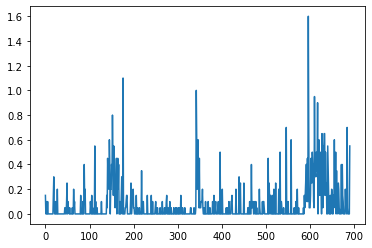

In [128]:
plt.figure
plt.plot(X[0,:]) ## KB spikes of the first trial

fit logistic regression models

In [129]:
# First define the model
log_reg = LogisticRegression(penalty='none',solver='newton-cg')

#Then fit it to data
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

There's two steps here:

- We *initialized* the model with a hyperparameter, telling it what penalty to use (we'll focus on this in the second part of the notebook)
- We *fit* the model by passing it the `X` and `y` objects.

In [130]:
#get accuracy of the model on thectraining set (should be high!)

# Fitting the model performs maximum likelihood optimization, learning a set of *feature weights*. 
# We can use those learned weights to *classify* new data, or predict the labels for each sample:
y_pred = log_reg.predict(X) ## classifying the training data

In [131]:
len(y_pred)

276

In [136]:
def compute_accuracy(X, y, model):
  """Compute accuracy of classifier predictions.
  
  Args:
    X (2D array): Data matrix
    y (1D array): Label vector
    model (sklearn estimator): Classifier with trained weights.

  Returns:
    accuracy (float): Proportion of correct predictions.  
  """

  y_pred = model.predict(X)
  accuracy = np.sum(y_pred == y)/len(y) #or np.mean() in the last part

  return accuracy

# Uncomment and run to test your function:
train_accuracy = compute_accuracy(X, y, log_reg)
print(f"Accuracy on the training data: {train_accuracy:.2%}")

Accuracy on the training data: 100.00%


In [137]:
## Sam (same as prev step)
#train_accuracy = np.mean(y_pred == y)
#print(f"Accuracy on the training data: {train_accuracy:.2%}") 

Cross-validatinng using scikit-learn helper functions

L2 Rwgularization below

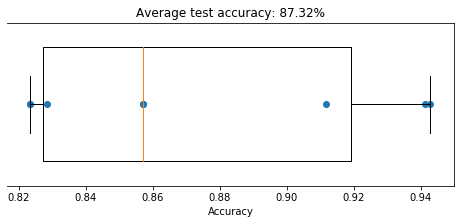

In [154]:
#get accuracy of the model on a k-fold cross validated set

k=8 #choose k-fold
reg = 'l2' #choose regularization. 'none', 'l1', or 'l2'
lam = 1 #choose lambda for regularizer

#fit model
#log_reg = LogisticRegression(penalty='none').fit(X, y)
log_reg = LogisticRegression(penalty=reg, C=1/lam, solver='lbfgs').fit(X, y)

#get cross-validated accuracies
#accuracies = cross_val_score(LogisticRegression(penalty='none'), X, y, cv=8) ##KB the way it was used in the tutorial 
accuracies = cross_val_score(log_reg, X, y, cv=k)

#plot the resulting accuracies
f, ax = plt.subplots(figsize=(8, 3))
ax.boxplot(accuracies, vert=False, widths=.7)
ax.scatter(accuracies, np.ones_like(accuracies))
ax.set(
  xlabel="Accuracy",
  yticks=[],
  title=f"Average test accuracy: {accuracies.mean():.2%}"
)
ax.spines["left"].set_visible(False)

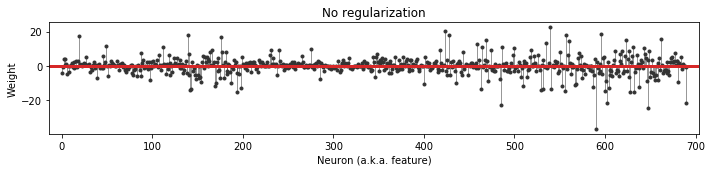

In [156]:
## KB 
log_reg = LogisticRegression(penalty="none").fit(X, y)
plot_weights({"No regularization": log_reg})

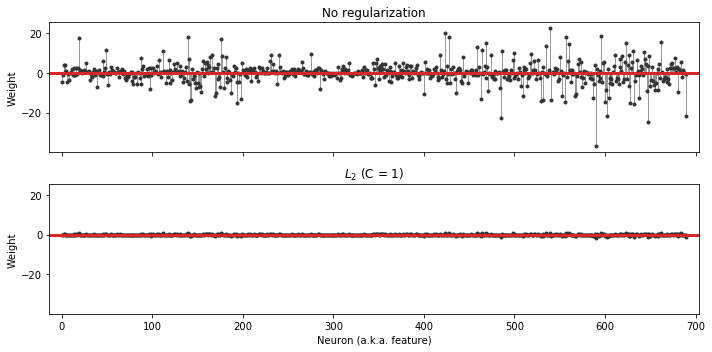

In [157]:
##KB 
log_reg_l2 = LogisticRegression(penalty="l2", C=1).fit(X, y)

# now show the two models
models = {
  "No regularization": log_reg,
  "$L_2$ (C = 1)": log_reg_l2,
}
plot_weights(models)

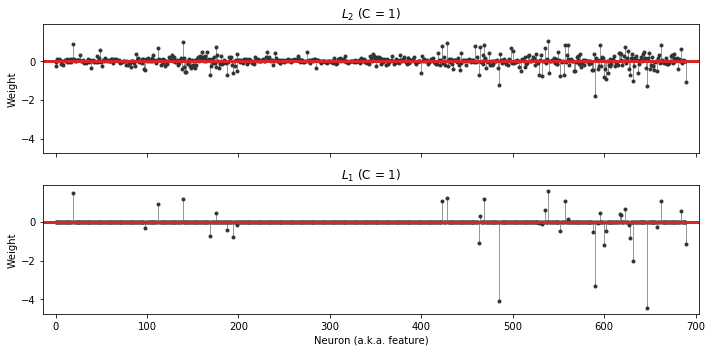

In [158]:
## KB just to test L1

log_reg_l1 = LogisticRegression(penalty="l1", C=1, solver="saga", max_iter=5000) #too low can we stuck in local min
log_reg_l1.fit(X, y)
models = {
  "$L_2$ (C = 1)": log_reg_l2,
  "$L_1$ (C = 1)": log_reg_l1,
}
plot_weights(models)

#S almost uses L2 
#once fitted we can take out the 0s, it can be faster

In [162]:
def model_selection(X, y, C_values, CV_values):
    """Compute CV accuracy for each C value.

    Args:
    X (2D array): Data matrix
    y (1D array): Label vector
    C_values (1D array): Array of hyperparameter values

    Returns:
    accuracies (1D array): CV accuracy with each value of C

    """
    accuracies_all = []

    for CV in CV_values:

        accuracies = []

        for C in C_values:

            # Initialize and fit the model
            model = LogisticRegression(penalty='l2',C=C, solver='lbfgs',max_iter=5000)
            model.fit(X,y)

            # Get the accuracy for each test split
            accs = cross_val_score(model,X,y,cv=int(CV))

            # Store the average test accuracy for this value of C
            accuracies.append(np.mean(accs))

        accuracies_all.append(accuracies)

    return accuracies_all



# Use log-spaced values for C and CV

C_values = np.logspace(-4, 4, 9)

#CV_values = np.linspace(2,20,10)
CV_values = np.logspace(1,7,7,base=2)
#CV_values = np.logspace(np.arange(2,50,2)

accuracies_all = model_selection(X, y, C_values, CV_values)

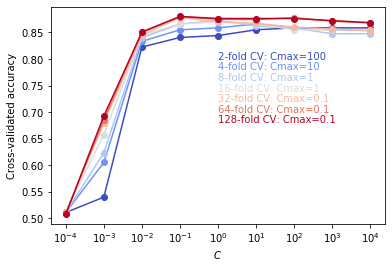

In [163]:
ax = plt.figure().subplots()
ax.set_xscale("log")
cmap = plt.cm.get_cmap('coolwarm')
for i,accuracies in enumerate(accuracies_all):
    c = cmap(i/(len(accuracies_all)-1))
    ax.plot(C_values, accuracies, marker="o",color=c)
    best_C = C_values[np.argmax(accuracies)]
    plt.text(1,0.8-0.02*i,f"{CV_values[i]:1g}-fold CV: Cmax={best_C:1g}",color=c)
ax.set(
  xticks=C_values,
  xlabel="$C$",
  ylabel="Cross-validated accuracy",
)
plt.show()

# Old stuff or useful code/links

In [30]:







##To adjust the size of one figure:

#import matplotlib.pyplot as plt

#fig=plt.figure(figsize=(15, 15))
#To change the default settings, and therefore all your plots:

#import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [15, 15]

Useful links: 

data: 
https://www.w3resource.com/pandas/dataframe/dataframe-plot-area.php
https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
https://www.delftstack.com/howto/python-pandas/how-to-create-an-empty-column-in-pandas-dataframe/

loop issues: 
https://www.datacamp.com/community/tutorials/for-loops-in-python?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034349&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1011752&gclid=EAIaIQobChMIkfT0pKXj6gIVhIbVCh0ctg9-EAAYASAAEgKCSvD_BwE


plot: 
https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


In [ ]:
## JUST TO CHECK THE WHAT THE DIFF VARS MEAN
# pars trials info =================================
# create spike_df tataframe, with each spike time and the cluster it belongs to
trial_df = pd.DataFrame( 
    { 'trials_resp_choice':session['trials_response_choice'][:,0], #-1 for Right choice (i.e. correct when stimuli are on the right); +1 for left choice; 0 for Nogo choice. Note that in a small percentage of cases (~4%, see manuscript Methods) the initial wheel turn was in the opposite direction. 
    'trials_resp_times': session['trials_response_times'][:,0], 
     
    'trials_goCue_times': session['trials_goCue_times'][:,0] ,#auditory cue
     
    'trials_vStim_cLeft': session['trials_visualStim_contrastLeft'][:,0], #A value of 0.5 means 50% contrast. 0 is a blank screen: no change to any pixel values on that side (completely undetectable).
    'trials_vStim_cRight': session['trials_visualStim_contrastRight'][:,0], 
    'trials_vStim_times': session['trials_visualStim_times'][:,0], 

    'trials_intervals': session['trials_intervals'][:,0], 
                                                
    'trials_feedback_times': session['trials_feedback_times'][:,0],
    'trials_feedbackType': session['trials_feedbackType'][:,0], # -1 negative - noise; 1 positive - water
    
    'trials_included': session['trials_included'][:,0], #Importantly, while this variable gives inclusion criteria according to the definition of disengagement (see manuscript Methods), it does not give inclusion criteria based on the time of response, as used for most analyses in the paper.
    'trials_repNum': session['trials_repNum'][:,0], #Trials are repeated if they are "easy" trials (high contrast stimuli with large difference between the two sides, or the blank screen condition) and this keeps track of how many times the current trial's condition has been repeated.
    },
                       )
#????? 
# add spikes to session dictionary
session['trial_df']=trial_df

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Neuromatch-Academy-Project---Steinmetz-Dataset---Mouse-Mind-Reading" data-toc-modified-id="Neuromatch-Academy-Project---Steinmetz-Dataset---Mouse-Mind-Reading-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Neuromatch Academy Project - Steinmetz Dataset - Mouse Mind Reading</a></span></li><li><span><a href="#DFs:-" data-toc-modified-id="DFs:--3"><span class="toc-item-num">3&nbsp;&nbsp;</span><font color="blue">DFs: </font></a></span></li><li><span><a href="#ToDo:-" data-toc-modified-id="ToDo:--4"><span class="toc-item-num">4&nbsp;&nbsp;</span><font color="orange">ToDo: </font></a></span></li><li><span><a href="#Spikes:-" data-toc-modified-id="Spikes:--5"><span class="toc-item-num">5&nbsp;&nbsp;</span><font color="red">Spikes: </font></a></span><ul class="toc-item"><li><span><a href="#Plot-spike-trains:-" data-toc-modified-id="Plot-spike-trains:--5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><font color="blue">Plot spike trains: </font></a></span></li><li><span><a href="#Plot-spike-trains-around-event-with-histogram:-" data-toc-modified-id="Plot-spike-trains-around-event-with-histogram:--5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><font color="blue">Plot spike trains around event with histogram: </font></a></span></li></ul></li><li><span><a href="#Clusters:-" data-toc-modified-id="Clusters:--6"><span class="toc-item-num">6&nbsp;&nbsp;</span><font color="red">Clusters: </font></a></span></li><li><span><a href="#Trials:-" data-toc-modified-id="Trials:--7"><span class="toc-item-num">7&nbsp;&nbsp;</span><font color="red">Trials: </font></a></span></li><li><span><a href="#Wheel" data-toc-modified-id="Wheel-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Wheel</a></span></li><li><span><a href="#testing-other-codes" data-toc-modified-id="testing-other-codes-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>testing other codes</a></span><ul class="toc-item"><li><span><a href="#this-script-is-based-on-the-W1D4-tutorial-2-logistic-regression-decoder" data-toc-modified-id="this-script-is-based-on-the-W1D4-tutorial-2-logistic-regression-decoder-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>this script is based on the W1D4 tutorial 2 logistic regression decoder</a></span></li></ul></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Old-stuff-or-useful-code/links" data-toc-modified-id="Old-stuff-or-useful-code/links-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Old stuff or useful code/links</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#explore-dictionary-for-session" data-toc-modified-id="explore-dictionary-for-session-11.0.0.1"><span class="toc-item-num">11.0.0.1&nbsp;&nbsp;</span>explore dictionary for session</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt

from nma_class_k import NMA_project
#from nma_class_Copy1 import NMA_project

%matplotlib inline

In [ ]:
# only if you are on jupyter notebook not if on colab
#import qgrid 

In [ ]:
# link to parent folder with all datasets
#main_folder = "/content/gdrive/My Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "C:/Users/User/Google Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "Z:/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'

# create session object
nma_obj = NMA_project(main_folder) 

# default session is initialized, extract interesting dataframes in dedicated variables
#session = nma_obj.std_session
#channels_df = session['channels_df']
#spikes_df = session['spikes_df']
#clusters_df = session['clusters_df']
#trials_df = session['trials_df']





channels_df = session['channels_df']
spikes_df = session['spikes_df']
clusters_df = session['clusters_df']
trials_df = session['trials_df']
spikes_ar = session['spikes_ar']

#### explore dictionary for session
- each ession is a dictionary
- each element kontains eather a numpy array or a dataframe
- the most important dataframes we are going to work with are:
    - clusters_df: all the spikes and clusters
    - trials_df: all the behaviour data for all trials

In [ ]:
#how to pick a new variable from dataset "session"
some_var = session['spontaneous_intervals']
#print(len(some_var))
#some_var

In [ ]:
for key in nma_obj.std_session.keys():
    print(key)

In [ ]:
#test
A = [1, 2, 3,4,5,6,7]
for i in range(3,len(A)):
    print(i, A[i])